In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/ศลปหถก
%cp -av Datasets /content/datasets

In [ ]:
import os
!pip install transformers
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data
from torch.autograd import Variable
import numpy as np
import os
import shutil
import torch.optim as optim
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

In [ ]:
directory_path = ['/content/datasets/Not_EarCancer','/content/datasets/EarCancer/Melanoma','/content/datasets/EarCancer/Carcinoma/Basal carcinoma','/content/datasets/EarCancer/Carcinoma/Squamous carcinoma']
new_filename = ['Not_EarCancer','Melanoma','Basal_carcinoma','Squamous_carcinoma']
def rename_thefile(directory,file_name):
  new_filename = file_name
  i = 0
  # List all files in the directory
  file_list = os.listdir(directory)

  # Rename each file to "Not_EarCancer"
  for filename in file_list:
      i+=1
      src = os.path.join(directory, filename)
      dst = os.path.join(directory, new_filename+"_"+str(i)+".jpg")
      os.rename(src, dst)
j=0
for directory in directory_path:
  rename_thefile(directory,new_filename[j])
  j+=1
# Function to move a folder to another location
def move_folder(source_folder, destination_folder):
    try:
        shutil.move(source_folder, destination_folder)
        print(f"Moved '{source_folder}' to '{destination_folder}'.")
    except Exception as e:
        print(f"Error: {e}")

# Set the source folder path
source_folder_path = ["/content/datasets/EarCancer/Melanoma","/content/datasets/EarCancer/Carcinoma/Squamous carcinoma","/content/datasets/EarCancer/Carcinoma/Basal carcinoma"]
for i in source_folder_path:
  # Set the destination folder path
  destination_folder_path = "/content/datasets"

  # Move the source folder to the destination folder
  move_folder(i, destination_folder_path)

import shutil

# Function to delete a folder and its contents
def delete_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Deleted folder: {folder_path}")
    except Exception as e:
        print(f"Error: {e}")

# Set the folder path you want to delete
folder_to_delete = "/content/datasets/EarCancer"
# Delete the folder and its contents
delete_folder(folder_to_delete)
import os

base_dir = '/content/datasets'

for root, dirs, files in os.walk(base_dir):
    for dir_name in dirs:
        if " " in dir_name:
            new_dir_name = dir_name.replace(" ", "_")
            src_dir = os.path.join(root, dir_name)
            dst_dir = os.path.join(root, new_dir_name)
            os.rename(src_dir, dst_dir)
import os
import random
import shutil

def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

base_dir = '/content/DATASETS'
train_dir = '/content/DATASETS/train'
valid_dir = '/content/DATASETS/valid'
test_dir = '/content/DATASETS/test'

create_directory_if_not_exists(train_dir)
create_directory_if_not_exists(valid_dir)
create_directory_if_not_exists(test_dir)

def split_data(source_dir, target_train_dir, target_valid_dir, target_test_dir, split_ratio=(0.7, 0.1, 0.2)):
    classes = os.listdir(source_dir)
    for class_name in classes:
        class_path = os.path.join(source_dir, class_name)
        files = os.listdir(class_path)
        random.shuffle(files)

        train_split = int(len(files) * split_ratio[0])
        valid_split = int(len(files) * split_ratio[1])

        train_files = files[:train_split]
        valid_files = files[train_split:train_split + valid_split]
        test_files = files[train_split + valid_split:]

        for file in train_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(target_train_dir, class_name, file)
            create_directory_if_not_exists(os.path.dirname(dst_path))
            shutil.copy(src_path, dst_path)

        for file in valid_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(target_valid_dir, class_name, file)
            create_directory_if_not_exists(os.path.dirname(dst_path))
            shutil.copy(src_path, dst_path)

        for file in test_files:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(target_test_dir, class_name, file)
            create_directory_if_not_exists(os.path.dirname(dst_path))
            shutil.copy(src_path, dst_path)

# Define the source directory and call the split_data function
source_dir = '/content/datasets'
split_data(source_dir, train_dir, valid_dir, test_dir)


Moved '/content/datasets/EarCancer/Melanoma' to '/content/datasets'.
Moved '/content/datasets/EarCancer/Carcinoma/Squamous carcinoma' to '/content/datasets'.
Moved '/content/datasets/EarCancer/Carcinoma/Basal carcinoma' to '/content/datasets'.
Deleted folder: /content/datasets/EarCancer


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


Epoch [1/50] Training loss 0.8874 - Validation Loss: 0.6070 - Accuracy: 72.88%
Epoch [2/50] Training loss 0.5675 - Validation Loss: 0.6057 - Accuracy: 76.27%
Epoch [3/50] Training loss 0.4710 - Validation Loss: 0.5527 - Accuracy: 75.42%
Epoch [4/50] Training loss 0.3433 - Validation Loss: 0.6933 - Accuracy: 74.58%
Epoch [5/50] Training loss 0.2455 - Validation Loss: 0.6404 - Accuracy: 81.36%
Epoch [6/50] Training loss 0.1485 - Validation Loss: 0.7198 - Accuracy: 78.81%
Epoch [7/50] Training loss 0.1512 - Validation Loss: 0.7040 - Accuracy: 77.97%
Epoch [8/50] Training loss 0.1137 - Validation Loss: 0.7371 - Accuracy: 78.81%
Epoch [9/50] Training loss 0.1074 - Validation Loss: 0.7122 - Accuracy: 81.36%
Epoch [10/50] Training loss 0.0986 - Validation Loss: 0.6143 - Accuracy: 78.81%
Epoch [11/50] Training loss 0.0912 - Validation Loss: 0.6789 - Accuracy: 79.66%
Epoch [12/50] Training loss 0.0713 - Validation Loss: 0.7240 - Accuracy: 79.66%
Epoch [13/50] Training loss 0.0734 - Validation L

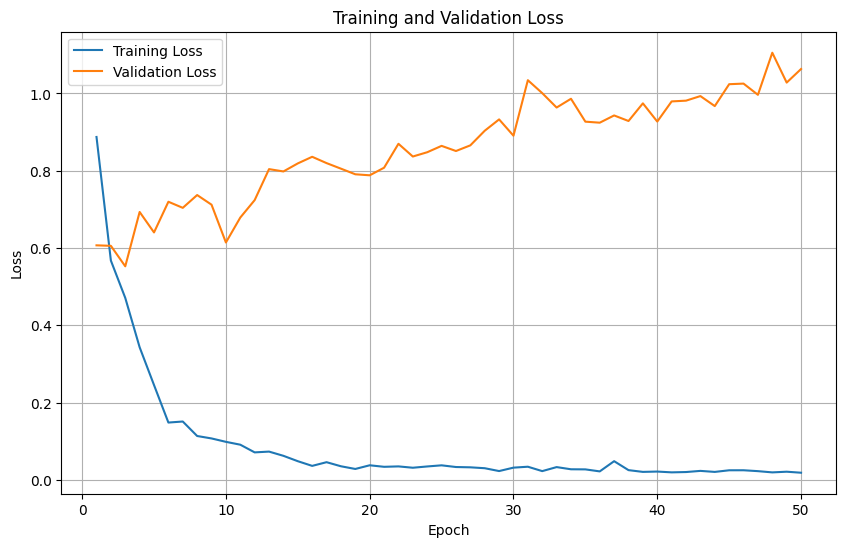

Test Loss: 1.0168 - Test Accuracy: 78.33%


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torch.optim.lr_scheduler import StepLR

import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Define transforms for data augmentation
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_val_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create custom dataset
train_dataset = ImageFolder(train_dir, transform=transform_train)
valid_dataset = ImageFolder(valid_dir, transform=transform_val_test)
test_dataset = ImageFolder(test_dir, transform=transform_val_test)

# Create dataloaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained ResNet model
model = models.resnet50(pretrained=True)
# Modify the final fully connected layer for the number of classes in your problem
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(2048, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 50
train_losses = []
valid_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    valid_loss /= len(valid_loader)
    valid_losses.append(valid_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] Training loss {train_loss:.4f} - Validation Loss: {valid_loss:.4f} - Accuracy: {(100 * correct / total):.2f}%")

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, num_epochs + 1), valid_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


model.eval()
test_loss = 0.0
correct = 0
total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct / total
test_loss /= len(test_loader)

print(f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.2f}%")



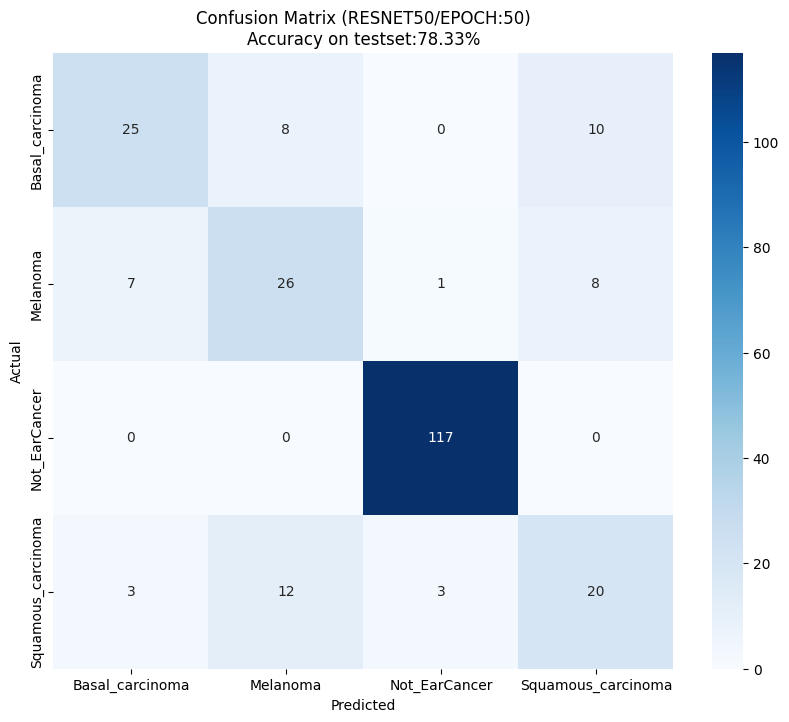

In [ ]:

confusion = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (RESNET50/EPOCH:{num_epochs})\nAccuracy on testset:{test_accuracy:.2f}%")
plt.show()


In [ ]:
torch.save(model.state_dict(), 'trained_model(Accuracyno.1).pth')


In [ ]:
import os

file_path = '/content/trained_model(Accuracyno.1).pth'

file_size = os.path.getsize(file_path)

def human_readable_size(size):
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024:
            return f"{size:.2f} {unit}"
        size /= 1024

print(f"File size: {human_readable_size(file_size)}")


File size: 90.02 MB


In [ ]:
model = models.resnet50(pretrained=False)
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(2048, num_classes)

model.load_state_dict(torch.load('trained_model.pth'))
